# DS105 Lesson 6 Solutions:

In [3]:
library("rcompanion")
library("car")
library("IDPmisc")
library("dplyr")
library(readr)

In [5]:
suicide <- read_csv("/Users/julieraeboucher/Desktop/suicide.csv")

Rows: 27820 Columns: 12
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (5): country, sex, age, country-year, generation
dbl (6): year, suicides_no, population, suicides/100k pop, HDI for year, gdp...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [8]:
colnames(suicide)

[1] "country"            "year"               "sex"               
 [4] "age"                "suicides_no"        "population"        
 [7] "suicides/100k pop"  "country-year"       "HDI for year"      
[10] "gdp_for_year ($)"   "gdp_per_capita ($)" "generation"

In [9]:
suicide1 = data.frame(suicide)

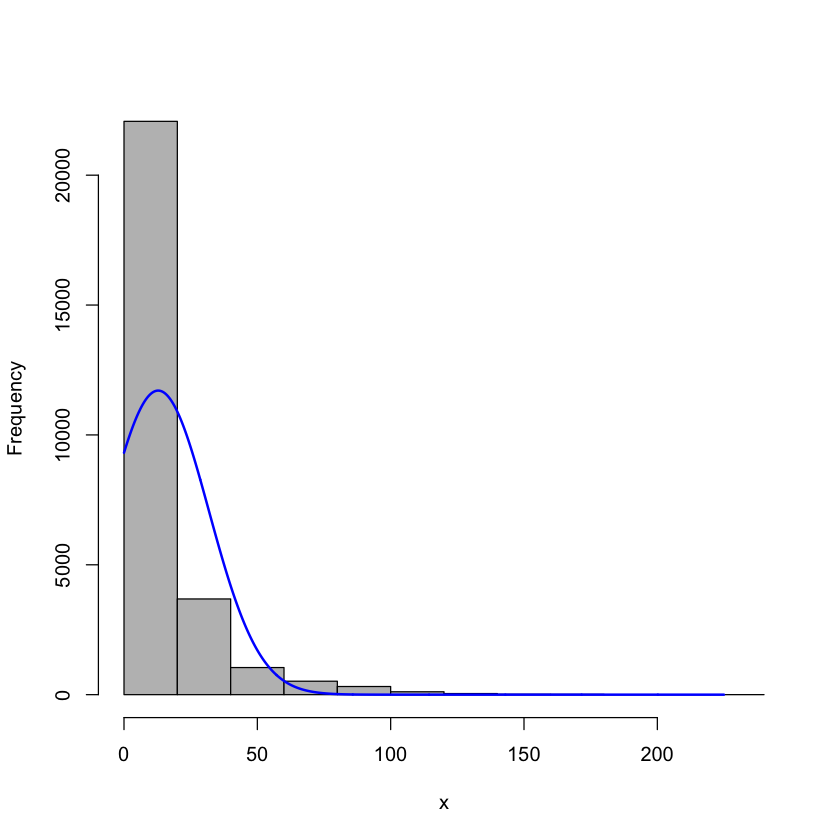

In [10]:
### Normality
plotNormalHistogram(suicide1$suicides.100k.pop)

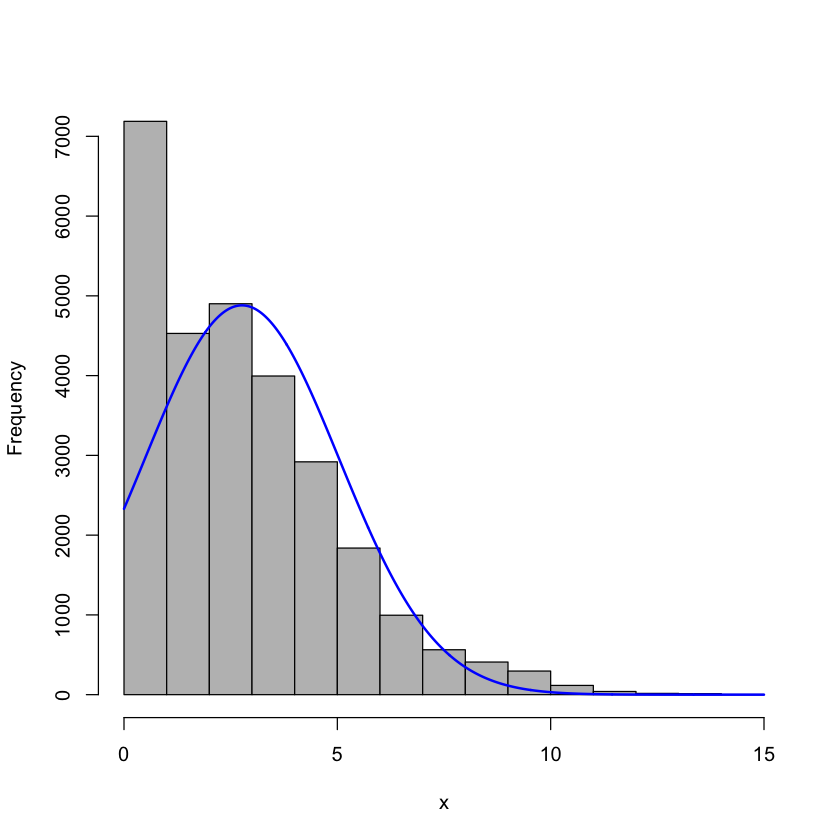

In [11]:
suicide1$suicides.100k.popSQRT <- sqrt(suicide1$suicides.100k.pop)
plotNormalHistogram(suicide1$suicides.100k.popSQRT)

In [12]:
suicide1$suicides.100k.popLOG <- log(suicide1$suicides.100k.pop)
plotNormalHistogram(suicide1$suicides.100k.popLOG)

ERROR: Error in seq.default(min(x), max(x), length = length): 'from' must be a finite number


In [13]:
suicide2 <- NaRV.omit(suicide1)

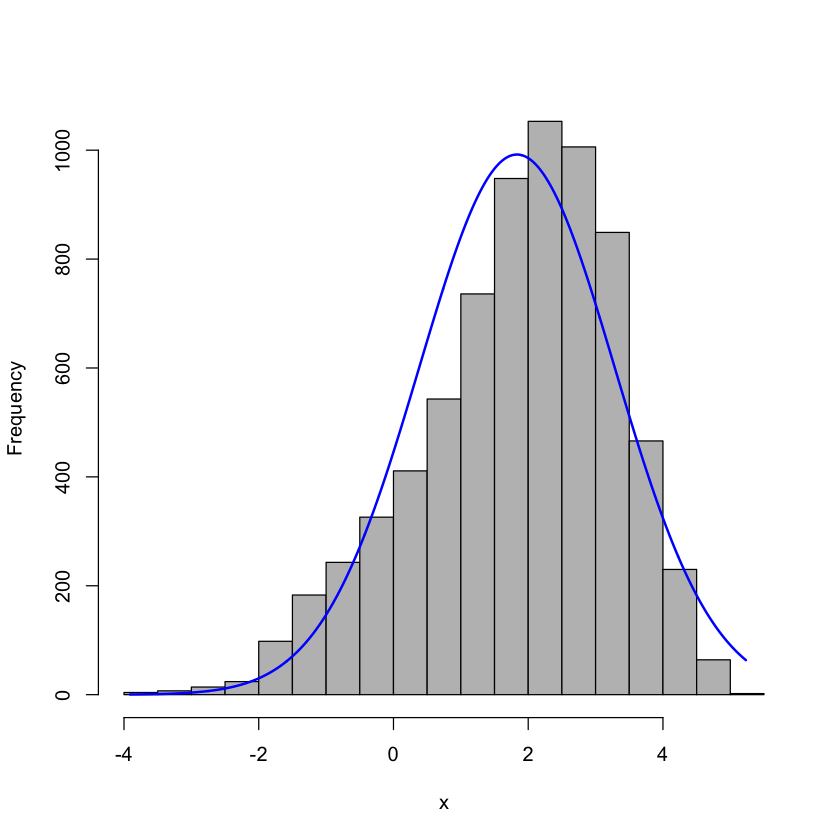

In [14]:
suicide2$suicides.100k.popLOG <- log(suicide2$suicides.100k.pop)
plotNormalHistogram(suicide2$suicides.100k.popLOG)

In [15]:
#### Use the log

### Homogeneity of Variance

leveneTest(suicides.100k.popLOG ~ generation, data=suicide2)

Warning message in leveneTest.default(y = y, group = group, ...):
“group coerced to factor.”


,Df,F value,Pr(>F)
,<int>,<dbl>,<dbl>
group,5,18.17709,5.712815e-18
,7201,NA,NA


In [16]:
#### This failed the assumption, but proceed anyway for learning purposes

### Sample size -you have more than enough data

## Run the analysis

RManova1 <- aov(suicides.100k.popLOG~(generation*year)+Error(country/(year)), suicide2)
summary(RManova1)


Warning message in aov(suicides.100k.popLOG ~ (generation * year) + Error(country/(year)), :
“Error() model is singular”



Error: country
                Df Sum Sq Mean Sq F value Pr(>F)  
generation       5  377.6   75.53   2.098 0.0746 .
year             1    4.3    4.25   0.118 0.7320  
generation:year  5   84.6   16.92   0.470 0.7975  
Residuals       77 2771.7   36.00                 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Error: country:year
                Df Sum Sq Mean Sq F value   Pr(>F)    
generation       5  35.50   7.101   4.638 0.000942 ***
year             1   0.73   0.729   0.476 0.492386    
generation:year  5  33.33   6.666   4.354 0.001528 ** 
Residuals       77 117.89   1.531                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Error: Within
                  Df Sum Sq Mean Sq F value Pr(>F)    
generation         5   4723   944.5    1087 <2e-16 ***
generation:year    5    886   177.2     204 <2e-16 ***
Residuals       7020   6099     0.9                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’

In [17]:
### Looks like there is a generational effect to suicide, and an interaction to how the year has affected the generation

## Post hocs

pairwise.t.test(suicide2$suicides.100k.popLOG, suicide2$generation, p.adjust="bonferroni")


	Pairwise comparisons using t tests with pooled SD 

data:  suicide2$suicides.100k.popLOG and suicide2$generation 

                Boomers G.I. Generation Generation X Generation Z Millenials
G.I. Generation 6.5e-16 -               -            -            -         
Generation X    1.2e-13 < 2e-16         -            -            -         
Generation Z    < 2e-16 < 2e-16         < 2e-16      -            -         
Millenials      < 2e-16 < 2e-16         < 2e-16      < 2e-16      -         
Silent          1.2e-05 2.0e-05         < 2e-16      < 2e-16      < 2e-16   

P value adjustment method: bonferroni 

In [22]:
### Looks like there is a difference in suicide rates among ALL the generations

## Determine Means and Draw Conclusions

suicideMeans <- suicide2 %>% group_by(generation, year) %>% summarise(Mean=mean(suicides.100k.pop))

# Generation Z is the least likely to commit suicide.  They were born mid 90's to early 2000s. The GI generation is the most likely. They were born 1901-1924. You can see that these differ over time as well - looks like the GI generation as do millenials just keeps rising in terms of suicide rates, while others like gen z and gen x are staying steady. 

`summarise()` has grouped output by 'generation'. You can override using the
`.groups` argument.
